<a href="https://colab.research.google.com/github/brunobro/decomposicao-em-valores-singulares-e-analise-de-componentes-principais/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Decomposição em Valores Singulares e Análise de Componentes Principais**

Neste vídeo tutorial aprenderemos como utilizar a Decomposição em Valores Singulares para implementar a Análise de Componentes Principais.

**Decomposição em Valores Singulares (DVS)**

A DVS é um método para decomposição matricial em duas matrizes ortogonais e um diagonal. É bastante utilizada para compressão de dados e também extração de atributos.

<br>

Dada uma matriz não-nula $\mathbf{A} \in \mathbb{R}^{m \times n}$ de posto $r = \min(m, n)$. Existem duas matrizes ortogonais $\mathbf{U} \in \mathbb{R}^{m \times m}$ e $\mathbf{V} \in \mathbb{R}^{n \times n}$ e uma diagonal $\mathbf{\Gamma} \in \mathbb{R}^{m \times n}$ tal que

$$
\mathbf{A} = \mathbf{U}\mathbf{\Gamma} \mathbf{V}^{T}
$$

onde $\mathbf{\Gamma} = diag(\gamma_1 , \gamma_2 , \cdots, \gamma_r, 0, 0, \cdots, 0)$, e os valores singulares são: $\gamma_i = \sqrt{\lambda_i}, i=1,\cdots, r$ tal que $\gamma_1 \geq \gamma_2 \geq \cdots \geq \gamma_r > 0$.

Os autovalores são obtidos pela decomposição de $\mathbf{A}\mathbf{A}^{T}$ ou $\mathbf{A}^{T}\mathbf{A}$. Vejamos:

$$
\mathbf{A}\mathbf{A}^{T} = \left( \mathbf{U}\mathbf{\Gamma}\mathbf{V}^{T} \right) \left( \mathbf{V}\mathbf{\Gamma}\mathbf{U}^{T} \right) = \mathbf{U}\mathbf{\Gamma}^2\mathbf{U}^{T} 
$$

$$
\mathbf{A}^{T} \mathbf{A}= \left( \mathbf{V}\mathbf{\Gamma}\mathbf{U}^{T} \right) \left( \mathbf{U}\mathbf{\Gamma}\mathbf{V}^{T} \right)  = \mathbf{V}\mathbf{\Gamma}^2\mathbf{V}^{T} 
$$


As matrizes da DVS recebem os nomes:
* $\mathbf{U}$: vetores singulares à esquerda, que tem os autovetores de $\mathbf{A}\mathbf{A}^{T}$
* $\mathbf{V}$: vetores singulares à direita, que tem os autovetores de $\mathbf{A}^{T}\mathbf{A}$

##Interpretação Geométrica da DVS

Seja $\mathbf{A} \in \mathbb{R}^{2 \times 2}$ uma transformação linear que leva os vetores $\mathbf{x} = [x_1 , x_2]$ nos vetores $\mathbf{y} = [y_1 , y_2]$, isto é:

$$
\mathbf{y} = \mathbf{A}\mathbf{x}
$$

Tomando a DVS da matriz $\mathbf{A}$ temos

$$
\mathbf{y} = \mathbf{U}\mathbf{\Gamma} \mathbf{V}^{T}\mathbf{x}
$$

Note que a equação anterior consiste de três transformações.
1.   $\mathbf{z}_1 = \mathbf{V}^{T}\mathbf{x}$: projeta o vetor $\mathbf{x}$ no espaço vetorial cuja base são as colunas de $\mathbf{V}^{T}$. Isso equivalerá a uma rotação das componentes de $\mathbf{x}$.
2.   $\mathbf{z}_2 = \mathbf{\Gamma} \mathbf{V}^{T}\mathbf{x}$: mantém as componentes no novo espaço vetorial, mas dilata ou comprime seus valores na direção dos eixos deste novo espaço.
3. $\mathbf{z}_3 =\mathbf{U}\mathbf{\Gamma} \mathbf{V}^{T}\mathbf{x}$: Tem o mesmo efeito de rotação, mas agora a projeção será no espaço vetorial gerado pelas colunas de $\mathbf{U}$.

**Exemplo:** 
Consideramos a seguinte matriz de transformação linear

$$
\mathbf{A} = \left[
  \begin{matrix}
  0.5 & 0.7\\
  -0.2 & 0.3
  \end{matrix}
  \right]
$$

e geramos vetores aleatórios $\mathbf{x} = [x_1 , x_2]$ para aplicar a transformação linear.

Ponto escolhido: [-0.5   0.24]


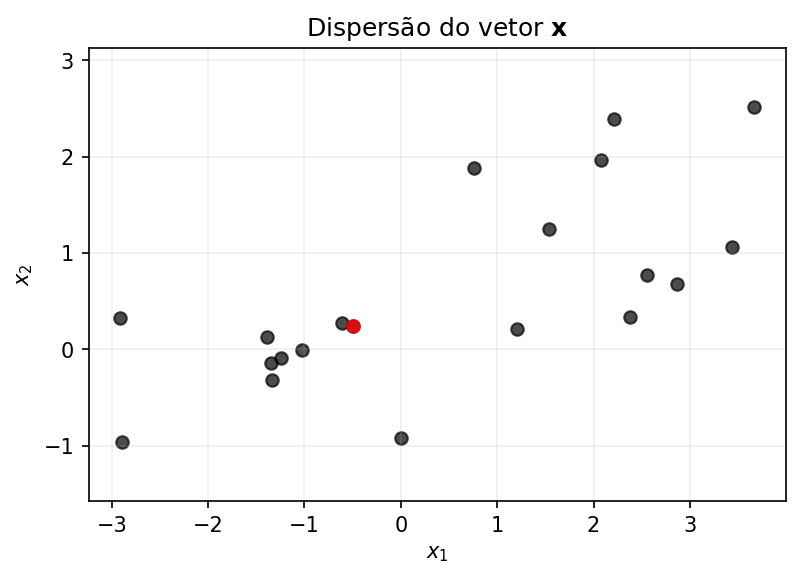

In [ ]:
import numpy as np
from matplotlib import pyplot as pl

'''
Gera dados x = [x1, x2] num espaço bidimensional para avaliar o 
efeito geométrico da aplicação da SVD
'''

#Quantidade de amostras
N = 20

#componente x1
x1 = np.array([
  -1.24,
  2.38,
  1.21,
  -0.61,
  2.21,
  -0.5 ,
  -1.03,
  -1.34,
  1.54,
  -1.35,
  -2.91,
  3.67,
  0.76,
  0.  ,
  2.87,
  -2.89,
  2.55,
  3.44,
  -1.39,
  2.08
 ])

#componente x2
x2 = np.array([
  -0.09,
  0.33,
  0.21,
  0.27,
  2.39,
  0.24,
  -0.01,
  -0.32,
  1.25,
  -0.14,
  0.32,
  2.51,
  1.88,
  -0.92,
  0.68,
  -0.96,
  0.77,
  1.06,
  0.13,
  1.96
])

#redimenciona os dados
x1 = np.reshape(x1, (N, 1))
x2 = np.reshape(x2, (N, 1))

#junta os dados em uma única matriz
dados = np.hstack((x1, x2))

#Amostra utilizada para rastrear as transformações
M = 5

#mostra o ponto M = 5
print('Ponto escolhido:', dados[M])

#matriz de transformação linear. Corresponde a uma rotação de 45º
A = np.array([[0.5, 0.7], [-0.2, 0.3]])

#exibe os dados
pl.figure(dpi=150)
pl.scatter(dados[:,0], dados[:,1], color='black', alpha=0.7)
pl.scatter(dados[M,0], dados[M,1], color='red', alpha=0.8)
pl.xlabel('$x_{1}$')
pl.ylabel('$x_{2}$')
pl.title(u'Dispersão do vetor $\mathbf{x}$')
pl.grid(alpha=0.2)
pl.axis('equal')
pl.show()


**O que a transformação linear $\mathbf{A}$ faz com os dados?**

Seja $\mathbf{p} = (-0.50,  0.24)$ o ponto (em vermelho) escolhido anteriormente. Este ponto é transformado para:

$$
\mathbf{A} \mathbf{p} = \left[
  \begin{matrix}
  0.5 & 0.7\\
  -0.2 & 0.3
  \end{matrix}
  \right] \left[
  \begin{matrix}
  -0.50\\
  0.24
  \end{matrix}
  \right] = \left[
  \begin{matrix}
  -0.082\\
  0.172
  \end{matrix}
  \right]
$$

A transformação linear $\mathbf{A}$ distorce o eixo de coordenadas representado pela base canônica $\lbrace \mathbf{e}_1 = [1, 0], \mathbf{e}_2 = [0,1] \rbrace$. Vejamos:

$$
\mathbf{A} \mathbf{e}_1 = \left[
  \begin{matrix}
  0.5 & 0.7\\
  -0.2 & 0.3
  \end{matrix}
  \right] \left[
  \begin{matrix}
  1\\
  0
  \end{matrix}
  \right] = \left[
  \begin{matrix}
  0.5\\
  -0.2
  \end{matrix}
  \right]
$$

$$
\mathbf{A} \mathbf{e}_2 = \left[
  \begin{matrix}
  0.5 & 0.7\\
  -0.2 & 0.3
  \end{matrix}
  \right] \left[
  \begin{matrix}
  0\\
  1
  \end{matrix}
  \right] = \left[
  \begin{matrix}
  0.7\\
  0.3
  \end{matrix}
  \right]
$$

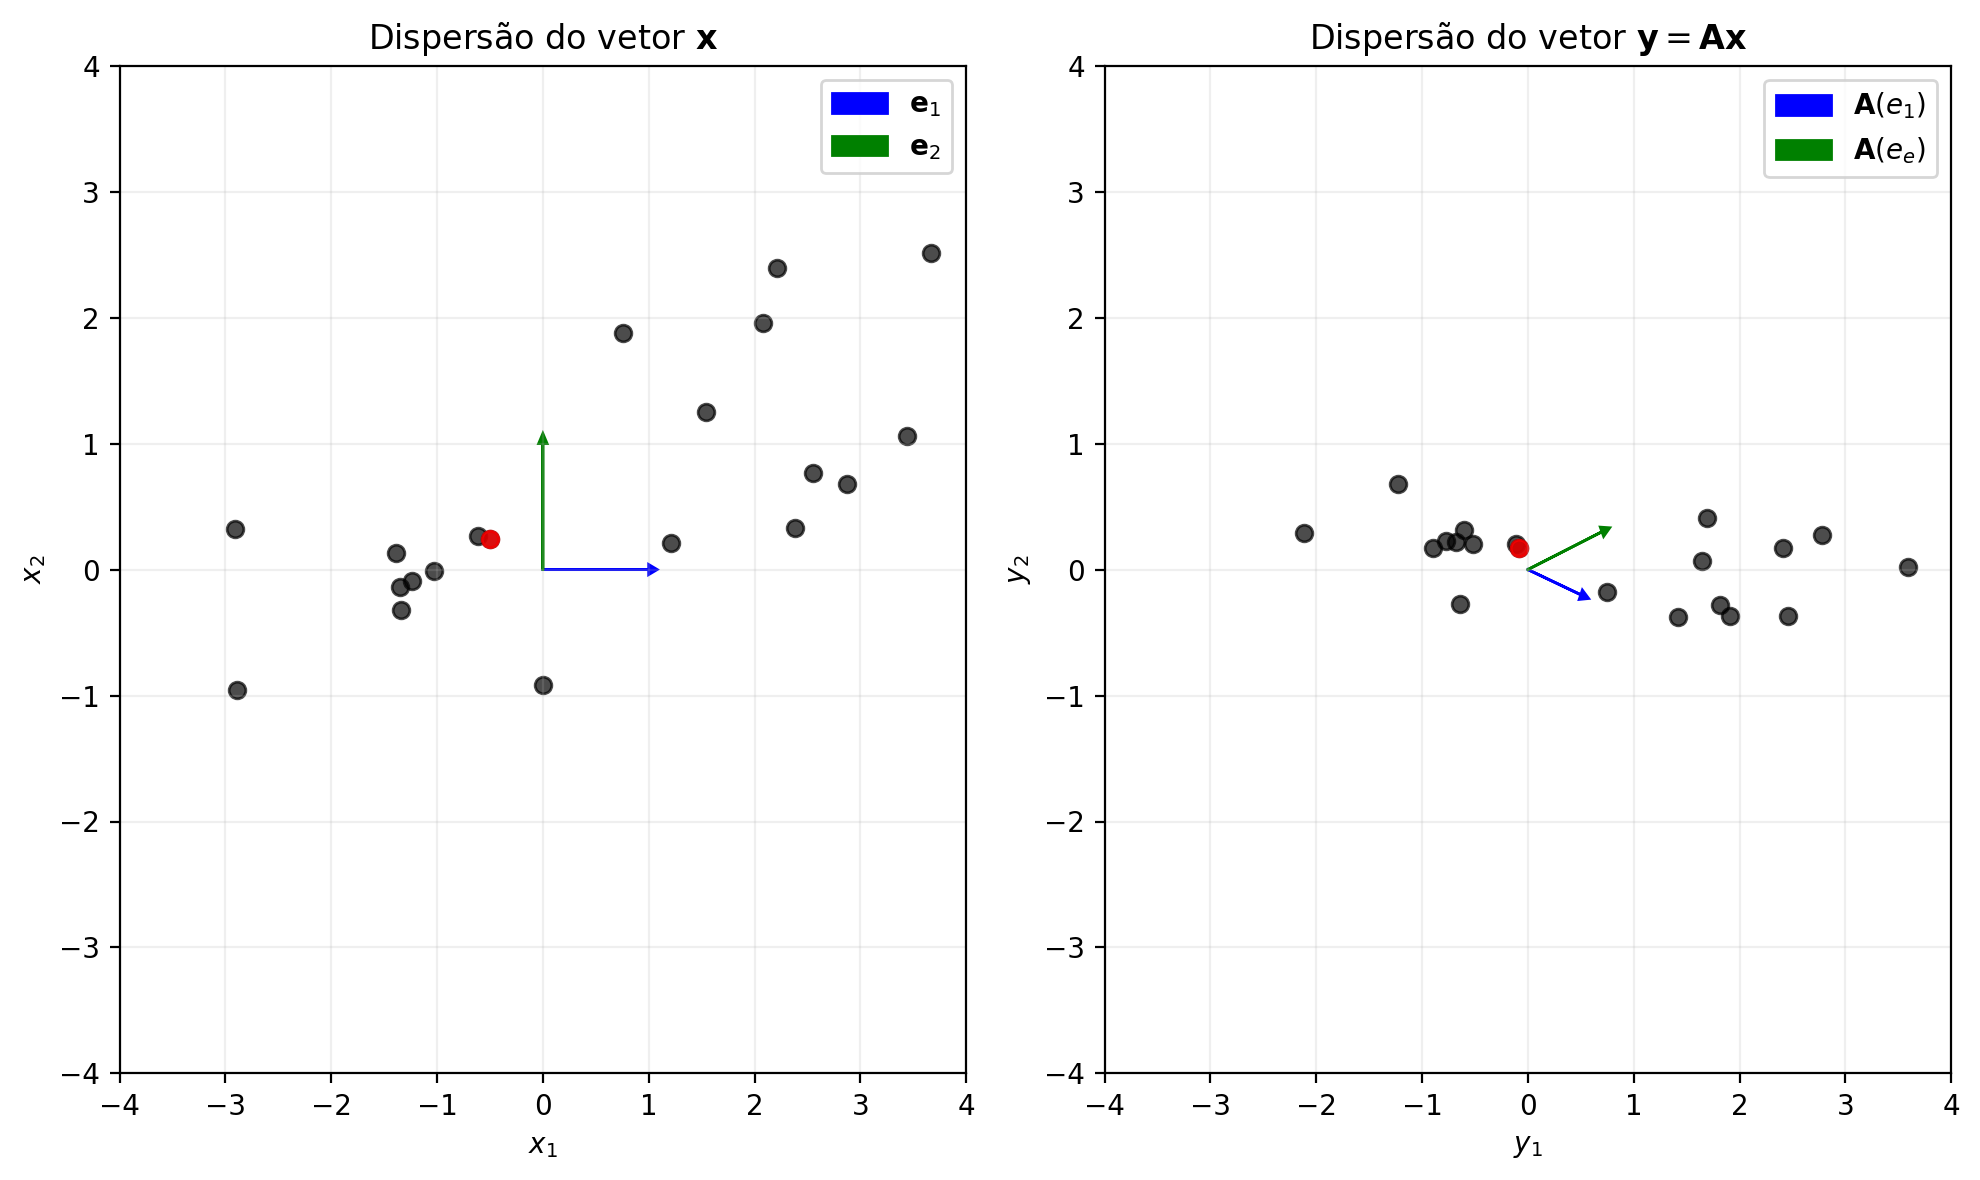

In [ ]:
'''
Aplica a transformação linear de uma matriz A
'''
#aplica a transformação
dados_ = np.dot(A, dados.T).T

#exibe os dados após a transformação
pl.figure(dpi=200, figsize=(10,6))
pl.subplot(121)
pl.scatter(dados[:,0], dados[:,1], color='black', alpha=0.7)
pl.scatter(dados[M,0], dados[M,1], color='red', alpha=0.8)
e1 = pl.arrow(0, 0, 1, 0, head_width=0.08, head_length=0.08, color='blue')#eixo x
e2 = pl.arrow(0, 0, 0, 1, head_width=0.08, head_length=0.08, color='green') #eixo y
pl.legend([e1,e2],['$\mathbf{e}_{1}$','$\mathbf{e}_{2}$'])
pl.xlabel('$x_{1}$')
pl.ylabel('$x_{2}$')
pl.title(u'Dispersão do vetor $\mathbf{x}$')
pl.grid(alpha=0.2)
pl.ylim((-4, 4))
pl.xlim((-4, 4))
pl.yticks(np.arange(-4, 5, 1))
pl.xticks(np.arange(-4, 5, 1))
pl.subplot(122)
pl.scatter(dados_[:,0], dados_[:,1], color='black', alpha=0.7)
pl.scatter(dados_[M,0], dados_[M,1], color='red', alpha=0.8)
pl.xlabel('$y_{1}$')
pl.ylabel('$y_{2}$')
pl.title(u'Dispersão do vetor $\mathbf{y} = \mathbf{A}\mathbf{x}$')
Ae1 = pl.arrow(0, 0, 0.5, -0.2, head_width=0.08, head_length=0.08, color='blue')#eixo x
Ae2 = pl.arrow(0, 0, 0.7, 0.3, head_width=0.08, head_length=0.08, color='green') #eixo y
pl.legend([Ae1, Ae2],['$\mathbf{A}(e_{1})$','$\mathbf{A}(e_{e})$'])
pl.grid(alpha=0.2)
pl.ylim((-4, 4))
pl.xlim((-4, 4))
pl.yticks(np.arange(-4, 5, 1))
pl.xticks(np.arange(-4, 5, 1))
pl.tight_layout()
pl.show()

In [ ]:
'''
Calcula a DVS e exibe as transformações sucessivas realizadas pelas matrizes
da decomposição
'''

#calcula a decomposição em valores singulares da transformação
U, S, Vt = np.linalg.svd(A, full_matrices=True)
S = np.diag(S)

print('Matriz de valores singulares:\n', S)
print('Matriz dos vetores singulares à esquerda:\n', U)
print('Matriz dos vetores singulares à direita:\n', Vt)

print('Ângulos de rotação:')
print('\t Vt:', np.rad2deg(np.arccos(Vt[0][0])), ' graus')
print('\t U:', np.rad2deg(np.arccos(U[0][0])), ' graus')

Matriz de valores singulares:
 [[0.87133797 0.        ]
 [0.         0.33282149]]
Matriz dos vetores singulares à esquerda:
 [[-0.98506108 -0.1722053 ]
 [-0.1722053   0.98506108]]
Matriz dos vetores singulares à direita:
 [[-0.52573111 -0.85065081]
 [-0.85065081  0.52573111]]
Ângulos de rotação:
	 Vt: 121.71747441146103  graus
	 U: 170.0839350748906  graus


**Resultado da Transformação $\mathbf{z}_1 = \mathbf{V}^{T}\mathbf{x}$** 
onde $\mathbf{x} = [x_1, x_2]$ são os pontos gerados antes.

Para o ponto $\mathbf{p}$ utilizado anteriormente temos:

$$
\mathbf{V}^{T} \mathbf{p} = \left[
  \begin{matrix}
  -0.98 & -0.17\\
  -0.17 & 0.98
  \end{matrix}
  \right] \left[
  \begin{matrix}
  -0.50\\
  0.24
  \end{matrix}
  \right] = \left[
  \begin{matrix}
  0.05\\
  0.55
  \end{matrix}
  \right]
$$

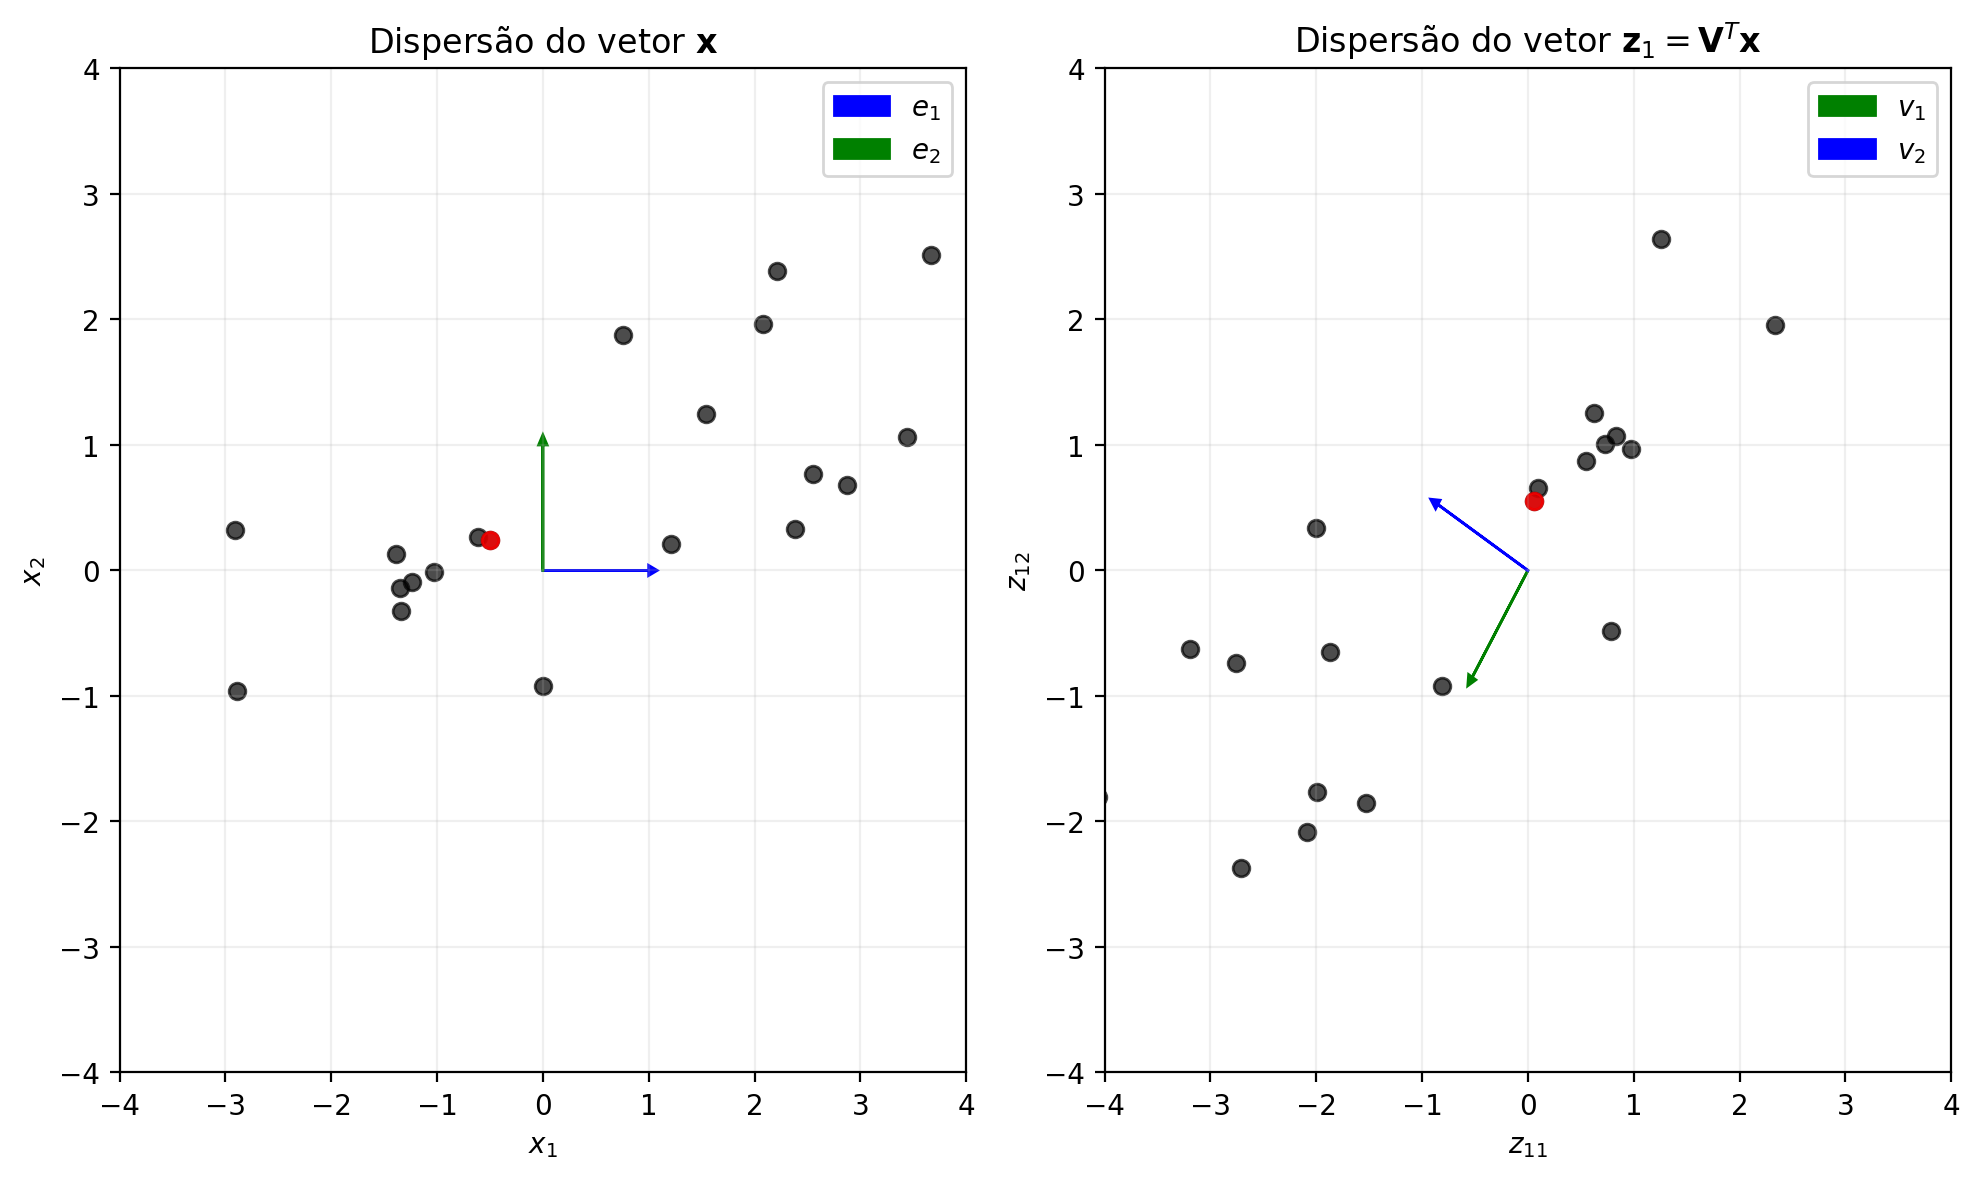

In [ ]:
#Computa z1. Rotação realizada por Vt
rotacao = np.dot(Vt, dados.T).T

pl.figure(dpi=200, figsize=(10,6))
pl.subplot(121)
pl.scatter(dados[:,0], dados[:,1], color='black', alpha=0.7)
pl.scatter(dados[M,0], dados[M,1], color='red', alpha=0.8)
pl.xlabel('$x_1$')
pl.ylabel('$x_2$')
pl.title(u'Dispersão do vetor $\mathbf{x}$')
e1 = pl.arrow(0, 0, 1, 0, head_width=0.08, head_length=0.08, color='blue')#eixo x
e2 = pl.arrow(0, 0, 0, 1, head_width=0.08, head_length=0.08, color='green') #eixo y
pl.legend([e1,e2],['$e_{1}$','$e_{2}$'])
pl.grid(alpha=0.2)
pl.ylim((-4, 4))
pl.xlim((-4, 4))
pl.yticks(np.arange(-4, 5, 1))
pl.xticks(np.arange(-4, 5, 1))
pl.subplot(122)
pl.scatter(rotacao[:,0], rotacao[:,1], color='black', alpha=0.7)
pl.scatter(rotacao[M,0], rotacao[M,1], color='red', alpha=0.8)
pl.title(u'Dispersão do vetor $\mathbf{z}_{1} = \mathbf{V}^{T}\mathbf{x}$')
l1 = pl.arrow(0, 0, Vt.item(0), Vt.item(1), head_width=0.08, head_length=0.08, color='green')#v1
l2 = pl.arrow(0, 0, Vt.item(2), Vt.item(3), head_width=0.08, head_length=0.08, color='blue')#v2
pl.xlabel('$z_{11}$')
pl.ylabel('$z_{12}$')
pl.legend([l1,l2],['$v_{1}$','$v_{2}$'])
pl.grid(alpha=0.2)
pl.ylim((-4, 4))
pl.xlim((-4, 4))
pl.yticks(np.arange(-4, 5, 1))
pl.xticks(np.arange(-4, 5, 1))
pl.tight_layout()
pl.show()

**Resultado da Transformação $\mathbf{z}_2 = \mathbf{\Gamma}\mathbf{V}^{T}\mathbf{x}$** 

Para o ponto $\mathbf{p}$ utilizado anteriormente temos:

$$
\mathbf{\Gamma}\mathbf{V}^{T} \mathbf{p} = \left[
  \begin{matrix}
  0.87 & 0\\
  0 & 0.33
  \end{matrix}
  \right] \left[
  \begin{matrix}
  -0.98 & -0.17\\
  -0.17 & 0.98
  \end{matrix}
  \right] \left[
  \begin{matrix}
  -0.50\\
  0.24
  \end{matrix}
  \right] = \left[
  \begin{matrix}
  0.05\\
  0.18
  \end{matrix}
  \right]
$$

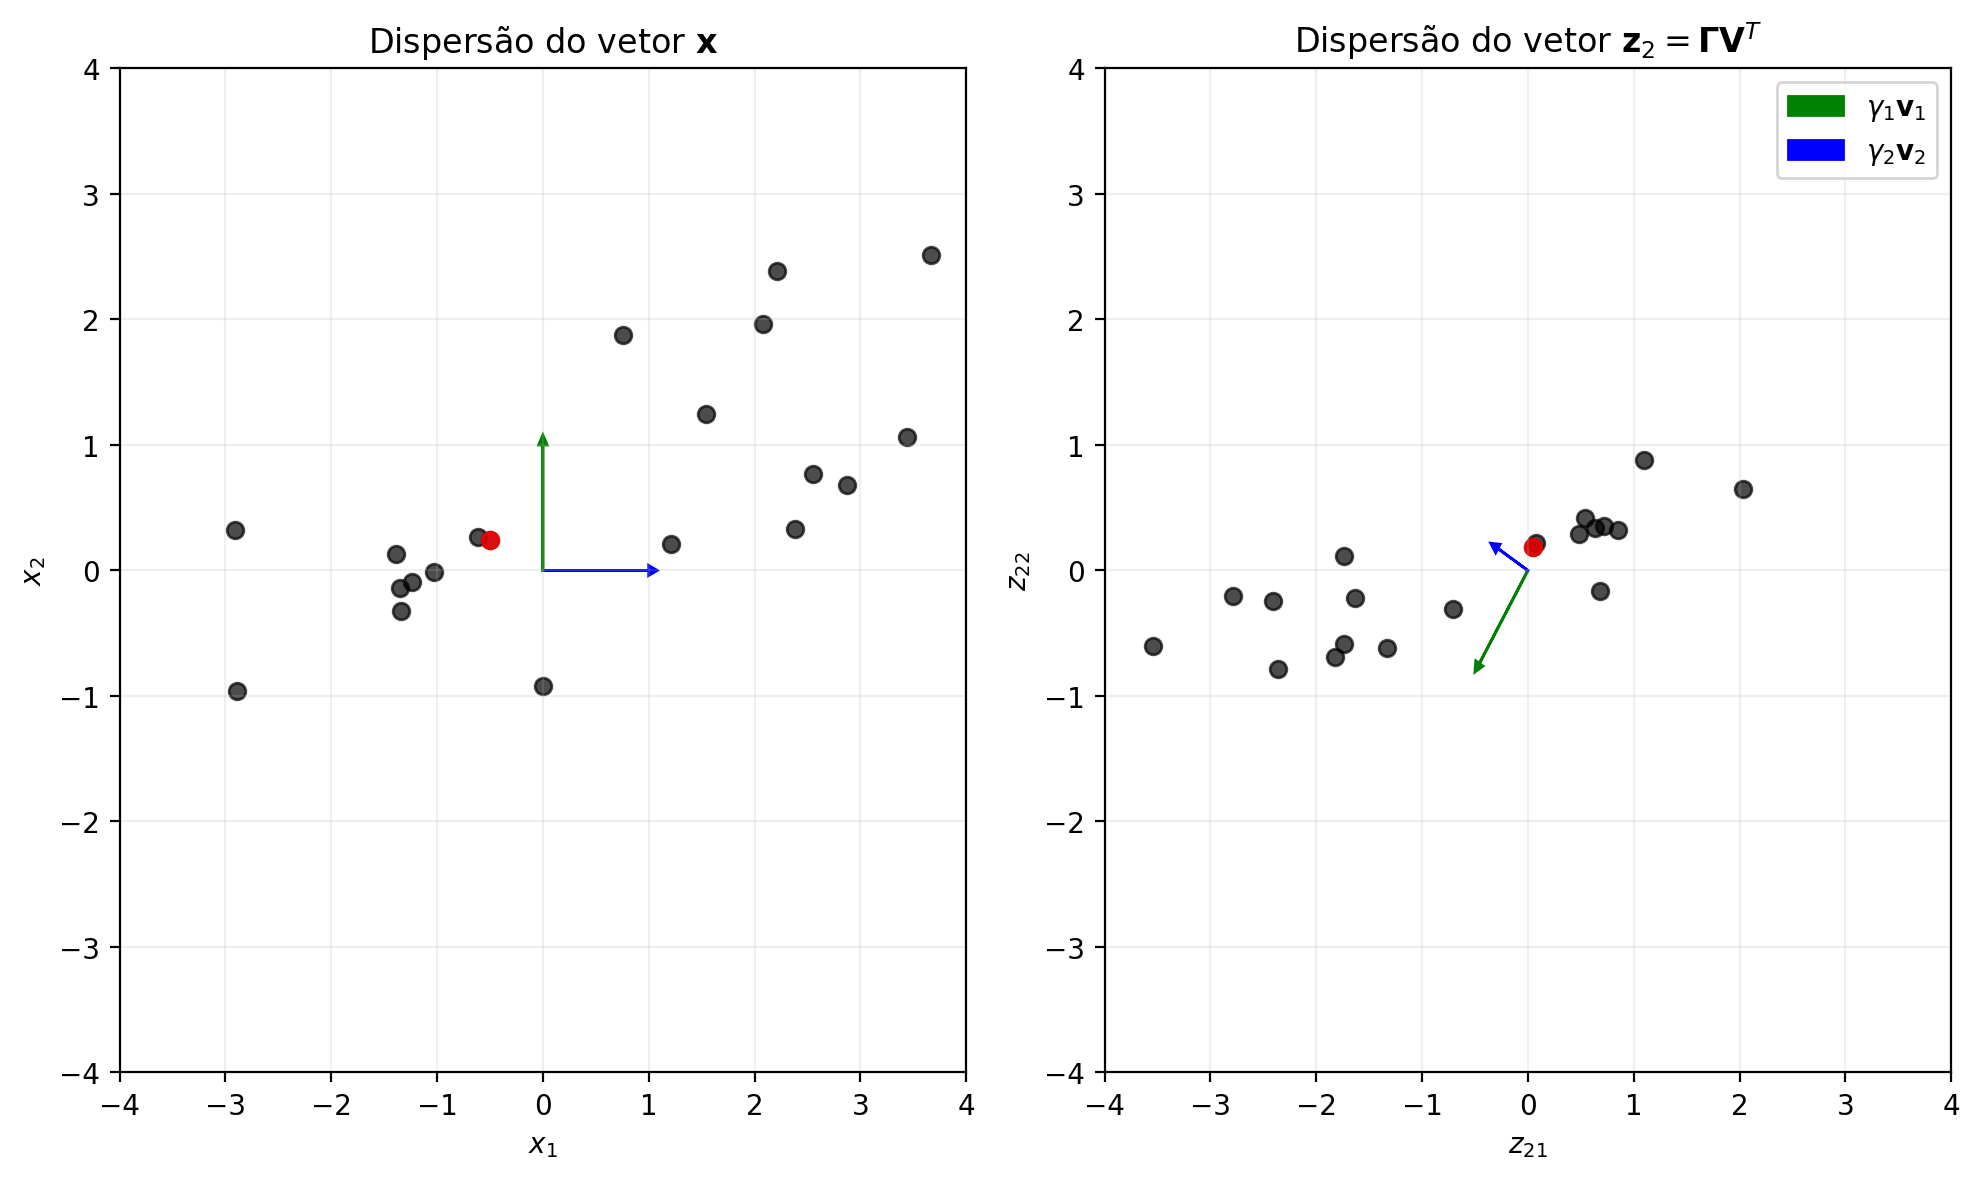

In [ ]:
#Computa z2. Dilata/comprime as componentes
dilatacao = np.dot(S, rotacao.T).T

#Produto Gama * Vt
SVt = np.dot(S, Vt)

pl.figure(dpi=200, figsize=(10, 6))
pl.subplot(121)
pl.scatter(dados[:,0], dados[:,1], color='black', alpha=0.7)
pl.scatter(dados[M,0], dados[M,1], color='red', alpha=0.8)
pl.xlabel('$x_{1}$')
pl.ylabel('$x_{2}$')
pl.title(u'Dispersão do vetor $\mathbf{x}$')
pl.arrow(0, 0, 1, 0, head_width=0.08, head_length=0.08, color='blue')#eixo x
pl.arrow(0, 0, 0, 1, head_width=0.08, head_length=0.08, color='green') #eixo y
pl.ylim((-4, 4))
pl.xlim((-4, 4))
pl.yticks(np.arange(-4, 5, 1))
pl.xticks(np.arange(-4, 5, 1))
pl.grid(alpha=0.2)
pl.subplot(122)
pl.scatter(dilatacao[:,0], dilatacao[:,1], color='black', alpha=0.7)
pl.scatter(dilatacao[M,0], dilatacao[M,1], color='red', alpha=0.8)
pl.title(u'Dispersão do vetor $\mathbf{z}_{2}=\mathbf{\Gamma}\mathbf{V}^{T}$')
p1 = pl.arrow(0, 0, SVt.item(0), SVt.item(1), head_width=0.08, head_length=0.08, color='green')#v1
p2 = pl.arrow(0, 0, SVt.item(2), SVt.item(3), head_width=0.08, head_length=0.08, color='blue')#v2
pl.xlabel('$z_{21}$')
pl.ylabel('$z_{22}$')
pl.legend([p1,p2],['$\gamma_{1}\mathbf{v}_{1}$','$\gamma_{2}\mathbf{v}_{2}$'])
pl.grid(alpha=0.2)
pl.ylim((-4, 4))
pl.xlim((-4, 4))
pl.yticks(np.arange(-4, 5, 1))
pl.xticks(np.arange(-4, 5, 1))
pl.tight_layout()
pl.show()

**Resultado da Transformação $\mathbf{z}_3 = \mathbf{U}\mathbf{\Gamma}\mathbf{V}^{T}\mathbf{x}$** 

Para o ponto $\mathbf{p}$ utilizado anteriormente temos:

$$
\mathbf{U}\mathbf{\Gamma}\mathbf{V}^{T} \mathbf{p} = \left[
  \begin{matrix}
  -0.52 & -0.85\\
  -0.85 & 0.52
  \end{matrix}
  \right]\left[
  \begin{matrix}
  0.87 & 0\\
  0 & 0.33
  \end{matrix}
  \right] \left[
  \begin{matrix}
  -0.98 & -0.17\\
  -0.17 & 0.98
  \end{matrix}
  \right] \left[
  \begin{matrix}
  -0.50\\
  0.24
  \end{matrix}
  \right] = \left[
  \begin{matrix}
  -0.08\\
  0.16
  \end{matrix}
  \right]
$$

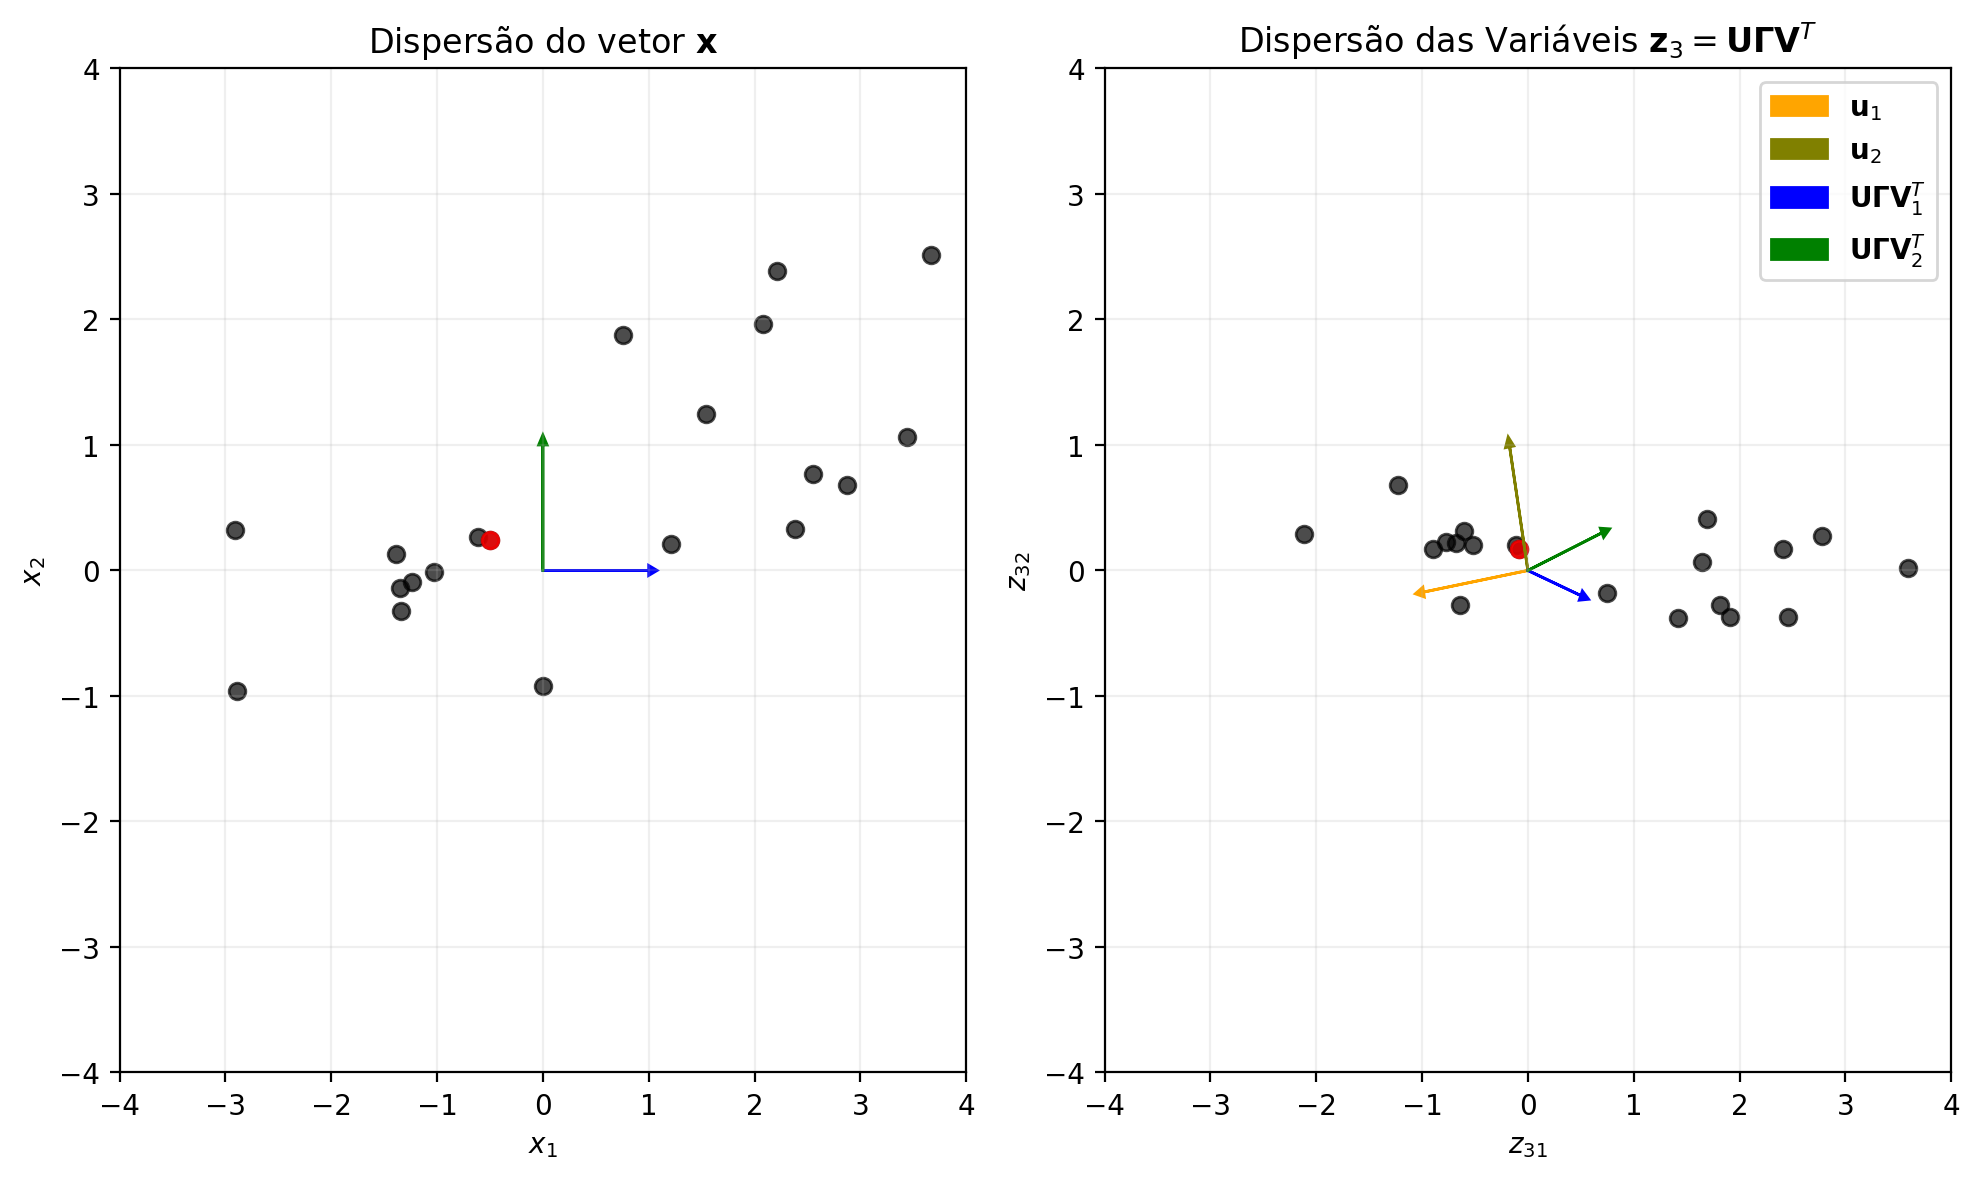

In [ ]:
#Computa y = z3. Rotação realizada por U
rotacao = np.dot(U, dilatacao.T).T

#Produto U*Gama*Vt
USVt = np.dot(U, SVt)

pl.figure(dpi=200, figsize=(10, 6))
pl.subplot(121)
pl.scatter(dados[:,0], dados[:,1], color='black', alpha=0.7)
pl.scatter(dados[M,0], dados[M,1], color='red', alpha=0.8)
pl.xlabel('$x_{1}$')
pl.ylabel('$x_{2}$')
pl.title(u'Dispersão do vetor $\mathbf{x}$')
pl.arrow(0, 0, 1, 0, head_width=0.08, head_length=0.08, color='blue')#eixo x
pl.arrow(0, 0, 0, 1, head_width=0.08, head_length=0.08, color='green') #eixo y
pl.ylim((-4, 4))
pl.xlim((-4, 4))
pl.yticks(np.arange(-4, 5, 1))
pl.xticks(np.arange(-4, 5, 1))
pl.grid(alpha=0.2)
pl.subplot(122)
pl.scatter(rotacao[:,0], rotacao[:,1], color='black', alpha=0.7)
pl.scatter(rotacao[M,0], rotacao[M,1], color='red', alpha=0.8)
pl.title(u'Dispersão das Variáveis $\mathbf{z}_{3}=\mathbf{U}\mathbf{\Gamma}\mathbf{V}^{T}$')
u1 = pl.arrow(0, 0, U.item(0), U.item(2), head_width=0.08, head_length=0.08, color='orange')#u1
u2 = pl.arrow(0, 0, U.item(1), U.item(3), head_width=0.08, head_length=0.08, color='olive')#u2
usvt1 = pl.arrow(0, 0, USVt.item(0), USVt.item(2), head_width=0.08, head_length=0.08, color='blue')#u1
usvt2 = pl.arrow(0, 0, USVt.item(1), USVt.item(3), head_width=0.08, head_length=0.08, color='green')#u2
pl.xlabel('$z_{31}$')
pl.ylabel('$z_{32}$')
pl.legend([u1,u2,usvt1,usvt2],['$\mathbf{u}_{1}$','$\mathbf{u}_{2}$','$\mathbf{U}\mathbf{\Gamma}\mathbf{V}^{T}_{1}$','$\mathbf{U}\mathbf{\Gamma}\mathbf{V}^{T}_{2}$'])
pl.grid(alpha=0.2)
pl.ylim((-4, 4))
pl.xlim((-4, 4))
pl.yticks(np.arange(-4, 5, 1))
pl.xticks(np.arange(-4, 5, 1))
pl.tight_layout()
pl.show()

#Componentes Principais via DVS

Considera-se uma matriz de dados $\mathbf{X} \in \mathbb{R}^{m \times n}$ com $m$ amostras e $n$ atributos cada amostra, cuja média das colunas é zero.

A matriz de covariância é dada por $\dfrac{\mathbf{X}^{T}\mathbf{X}}{m}$.

A DVS dessa matriz é:
$$
\begin{align}
\dfrac{\mathbf{X}^{T}\mathbf{X}}{m} &= \dfrac{1}{m}(\mathbf{U}\mathbf{\Gamma}\mathbf{V}^{T})^{T}(\mathbf{U}\mathbf{\Gamma}\mathbf{V}^{T})\\ 
&= \dfrac{1}{m}(\mathbf{V}\mathbf{\Gamma}^{T}\mathbf{U}^{T})(\mathbf{U}\mathbf{\Gamma}\mathbf{V}^{T})\\ 
&= \dfrac{1}{m}\mathbf{V}\mathbf{\Gamma}^{T}\mathbf{\Gamma}\mathbf{V}^{T}\\ 
&= \mathbf{V}\dfrac{\mathbf{\Gamma}^{2}}{m}\mathbf{V}^{T}\\ 
\end{align}
$$

onde as colunas de $\mathbf{V}$ são os autovetores da decomposição da matriz de covariância que fornece as direções principais.

Então os scores das componentes principais (CPs) são dados por $\mathbf{X}\mathbf{V}$, ou seja,
$$
\begin{align}
\mathbf{X} &= \mathbf{U}\mathbf{\Gamma}\mathbf{V}^{T} \\ 
\mathbf{X}\mathbf{V} &= \mathbf{U}\mathbf{\Gamma}\mathbf{V}^{T}\mathbf{V}\\
&= \mathbf{U}\mathbf{\Gamma}
\end{align}
$$
onde $\mathbf{U}\mathbf{\Gamma}$ são as componentes principais escaladas.

**Exemplo:** Consideremos uma matriz $\mathbf{X} \in \mathbb{R}^{178 \times 13}$ com  os dados do dataset Diabetes disponível aqui https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes . 

Nosso objetivo é projetar $\mathbf{X}$ num espaço onde seus linhas sejam combinações lineares das componentes principais fornecidas pela DVS.

Para simplificar a análise, e poder visualizar os dados vamos utilizar apenas dois atributos.

In [ ]:
import sklearn.datasets as ds
import pandas as pd
from IPython.display import display

#Carrega os dados do dataset
df = ds.load_wine(as_frame=True).data

#cria um dataframe com apenas dois atributos
df = pd.DataFrame(data=df[['ash','flavanoids']])
df = df.rename(columns={"ash": "c1", "flavanoids": "c2"})

display(df.describe())

,c1,c2
count,178.000000,178.000000
mean,2.366517,2.029270
std,0.274344,0.998859
min,1.360000,0.340000
25%,2.210000,1.205000
50%,2.360000,2.135000
75%,2.557500,2.875000
max,3.230000,5.080000


**Calcula a DVS dos dados**

In [ ]:
#Calcula a DVS
U, S, Vt = np.linalg.svd(df, full_matrices=True)

print('Valores singulares:\n', np.round(S, 4))

Valores singulares:
 [42.682  9.901]


**Obtém as Componentes Principais**

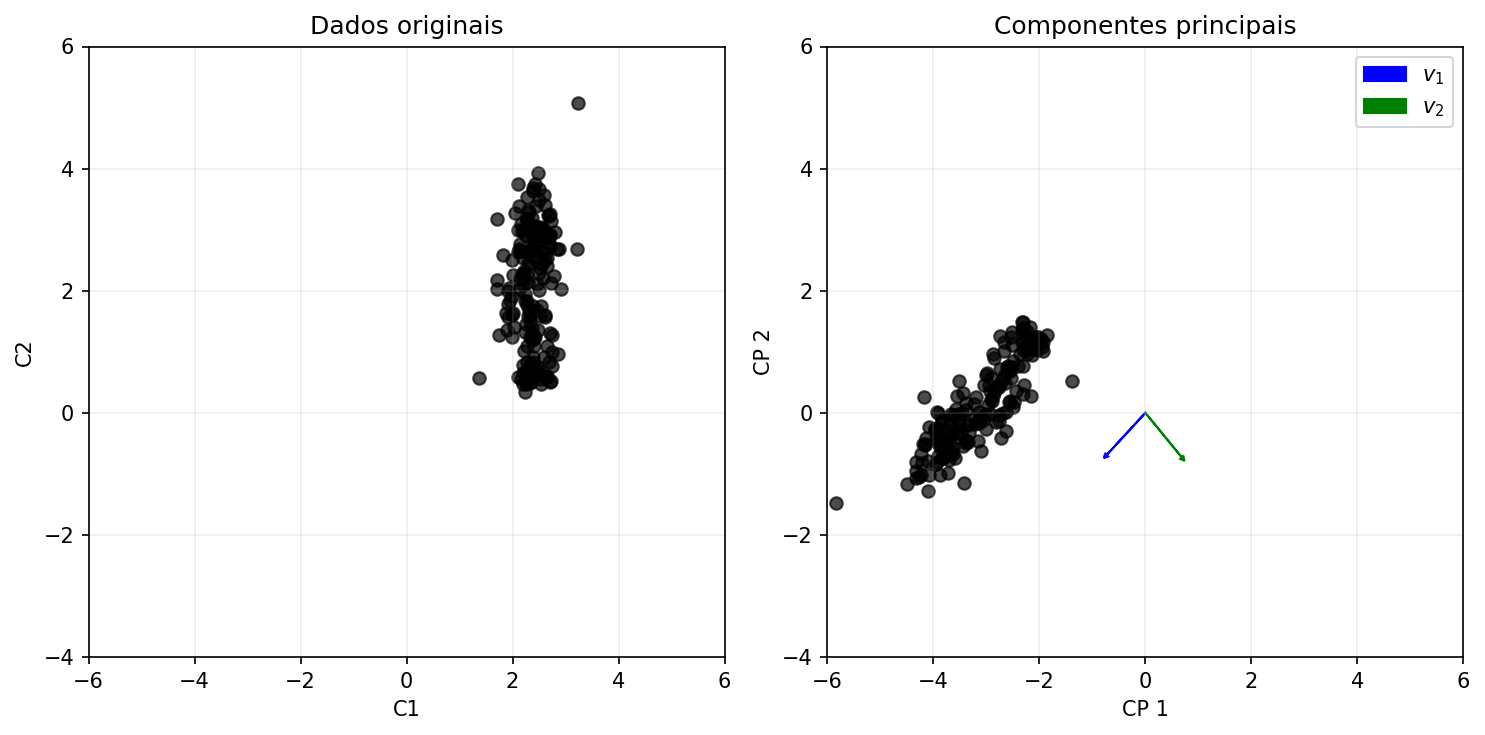

In [ ]:
'''
Faz uma gambiarra com a matriz de valores singulares, pois o metodo svd() da biblioteca
linalg retorna uma matriz (n x n), quando deveria retornar uma matriz (m x n)
'''
M = df.shape[0]
N = df.shape[1]
S_ = np.zeros((M, N))
S_[:N,:N] = np.diag(S)

#Componentes principais
CP = np.dot(U, S_)

#Exibe a dispersão dos dados
pl.figure(dpi=150, figsize=(10,5))
pl.subplot(121)
pl.scatter(df['c1'], df['c2'], color='k', alpha=0.7)
pl.xlabel('C1')
pl.ylabel('C2')
pl.xlim((-6, 6))
pl.ylim((-4, 6))
pl.title('Dados originais')
pl.grid(alpha=0.2)

pl.subplot(122)
pl.scatter(CP[:,0], CP[:,1], color='k', alpha=0.7)
v1 = pl.arrow(0, 0, Vt.item(0), Vt.item(1), head_width=0.08, head_length=0.08, color='blue')#eixo x
v2 = pl.arrow(0, 0, Vt.item(2), Vt.item(3), head_width=0.08, head_length=0.08, color='green') #eixo y
pl.xlim((-6, 6))
pl.ylim((-4, 6))
pl.legend([v1, v2],['${v}_{1}$','${v}_{2}$'])
pl.xlabel('CP 1')
pl.ylabel('CP 2')
pl.title('Componentes principais')
pl.grid(alpha=0.2)

pl.tight_layout()
pl.show()

**Referências**



*   I.T. Jolliffe. *Principal Component Analysis*, Second Edition, Springer, 2002.
*   G. Strang. *Linear Algebra and Its Applications*, Third Edition, Thomsom, 1988.

